# Data Exploration
Do your work for these exercises in a file named explore.

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from pandas.tools.plotting import scatter_matrix
from matplotlib import cm

from acquire import get_iris_data
from prepare import prep_iris_data

In [2]:
df = get_iris_data()

In [3]:
df = prep_iris_data(df)

In [4]:
df['sepal_area'] = df['sepal_length'] * df['sepal_width']
df['petal_area'] = df['petal_length'] * df['petal_width']

In [5]:
df.dtypes

species            object
sepal_length      float64
sepal_width       float64
petal_length      float64
petal_width       float64
species_encode      int64
sepal_area        float64
petal_area        float64
dtype: object

In [6]:
df.shape

(150, 8)

1. Split data into train (70%) & test (30%) samples. You should end with 2 data frames: train_df and test_df

In [7]:
train_df, test_df = train_test_split(
    df, test_size=.30, random_state=123, stratify=df.species)

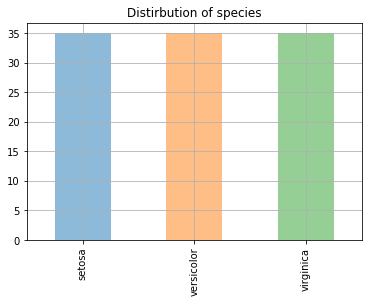

In [8]:
train_df.species.value_counts().sort_index().plot(kind = "bar",alpha = .5)
plt.title("Distirbution of species")
plt.grid(b = True , which = "major")

2. Create a swarmplot where the x-axis is each of the independent variable names (petal_length, petal_width, etc). The y-axis is the value of the variable. Use color to represent species as another dimension. Hint: You will to 'melt' the dataframe into a 'long' dataframe in order to accomplish this. What are your takeaways from this visualization?

In [9]:
df.columns

Index(['species', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species_encode', 'sepal_area', 'petal_area'],
      dtype='object')

In [10]:
sns.set(style="whitegrid", palette="muted")
val_vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species_encode','sepal_area','petal_area']

# "Melt" the dataset to "long-form" representation
df_melt = pd.melt(train_df, id_vars="species", 
                  value_vars=val_vars,
                  var_name="observed_feature", 
                  value_name='size')
df_melt.sample(10)

,species,observed_feature,size
150,virginica,sepal_width,2.60
316,setosa,petal_width,0.40
480,virginica,species_encode,2.00
473,setosa,species_encode,0.00
730,versicolor,petal_area,5.98
96,versicolor,sepal_length,5.50
464,setosa,species_encode,0.00
537,virginica,sepal_area,16.75
288,virginica,petal_length,5.70
679,virginica,petal_area,11.76


[Text(0, 0, 'sepal_length'),
 Text(0, 0, 'sepal_width'),
 Text(0, 0, 'petal_length'),
 Text(0, 0, 'petal_width'),
 Text(0, 0, 'species_encode'),
 Text(0, 0, 'sepal_area'),
 Text(0, 0, 'petal_area')]

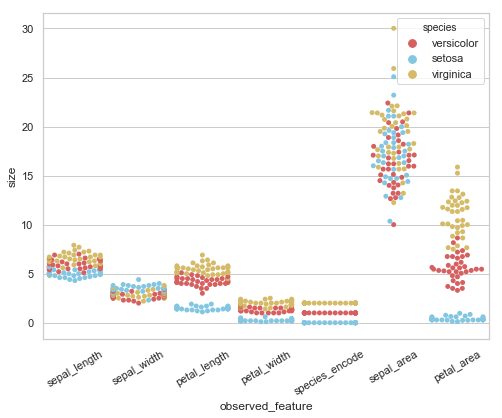

In [11]:
plt.figure(figsize=(8,6))

# Draw a categorical scatterplot to show each observation
ax = sns.swarmplot(x="observed_feature", y="size", hue='species',
              palette=["r", "c", "y"], data=df_melt)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

3. Create 4 subplots (2 rows x 2 columns) of scatterplots

sepal_length x sepal_width

petal_length x petal_width

sepal_area x petal_area

sepal_length x petal_length

Make your figure size 14 x 8. What are your takeaways?

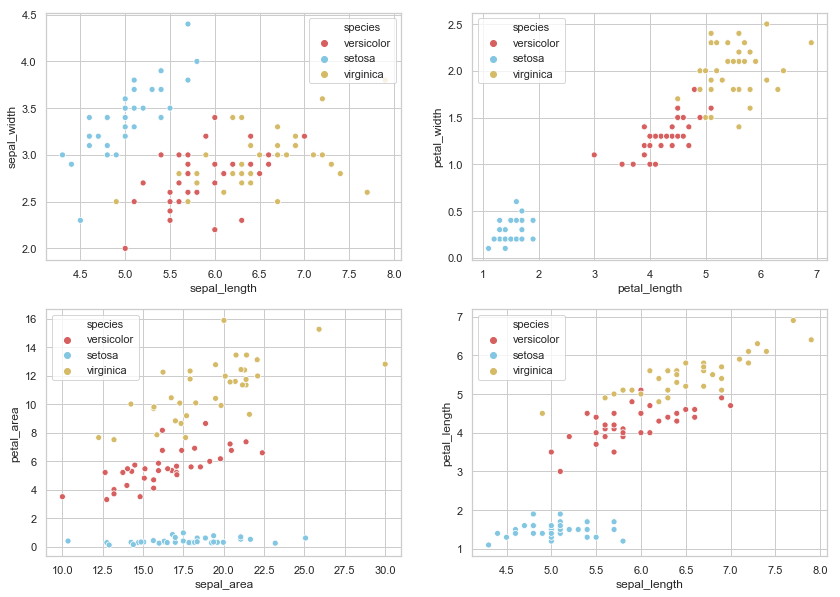

In [12]:
_, ax = plt.subplots(nrows=2, ncols=2, figsize=(14,10))


# Draw a categorical scatterplot to show each observation
plt.subplot(221)
sns.scatterplot(x = 'sepal_length',
              y = 'sepal_width', 
              hue='species',
              palette=['r', 'c', 'y'],
              #ax=ax[0],
              data=train_df)
plt.subplot(222)
sns.scatterplot(x="petal_length", 
              y="petal_width", 
              hue="species",
              palette=["r", "c", "y"], 
              #ax=ax[1],
              data=train_df)
plt.subplot(223)
sns.scatterplot(x="sepal_area", 
              y="petal_area", 
              hue="species",
              palette=["r", "c", "y"], 
              #ax=ax[2],
              data=train_df)
plt.subplot(224)
sns.scatterplot(x="sepal_length", 
              y="petal_length", 
              hue="species",
              palette=["r", "c", "y"],
              #ax=ax[3],
              data=train_df)

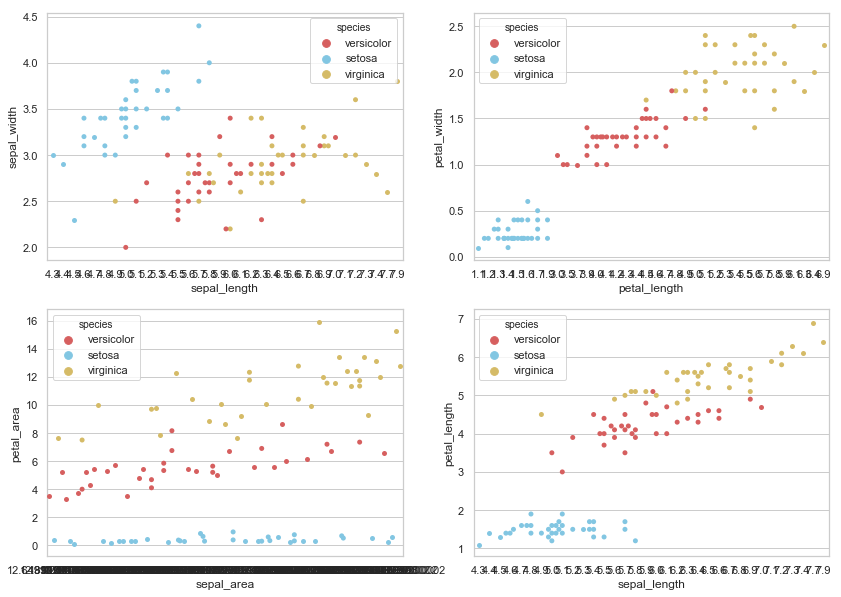

In [13]:
_, ax = plt.subplots(nrows=2, ncols=2, figsize=(14,10))


# Draw a categorical swarmplot to show each observation
plt.subplot(221)
sns.swarmplot(x = 'sepal_length',
              y = 'sepal_width', 
              hue='species',
              palette=['r', 'c', 'y'],
              #ax=ax[0],
              data=train_df)
plt.subplot(222)
sns.swarmplot(x="petal_length", 
              y="petal_width", 
              hue="species",
              palette=["r", "c", "y"], 
              #ax=ax[1],
              data=train_df)
plt.subplot(223)
sns.swarmplot(x="sepal_area", 
              y="petal_area", 
              hue="species",
              palette=["r", "c", "y"], 
              #ax=ax[2],
              data=train_df)
plt.subplot(224)
sns.swarmplot(x="sepal_length", 
              y="petal_length", 
              hue="species",
              palette=["r", "c", "y"],
              #ax=ax[3],
              data=train_df)


4. Create a heatmap of each variable layering correlation coefficient on top.

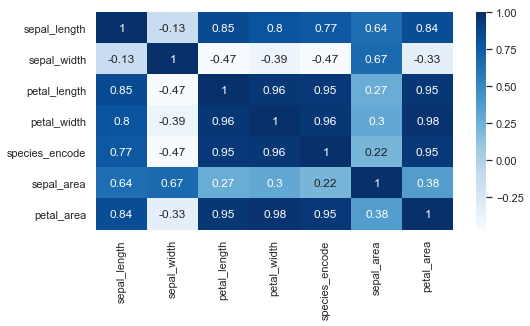

In [14]:
plt.figure(figsize=(8,4))
sns.heatmap(train_df.corr(), cmap='Blues', annot=True)

5. Create a scatter matrix visualizing the interaction of each variable

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  import sys


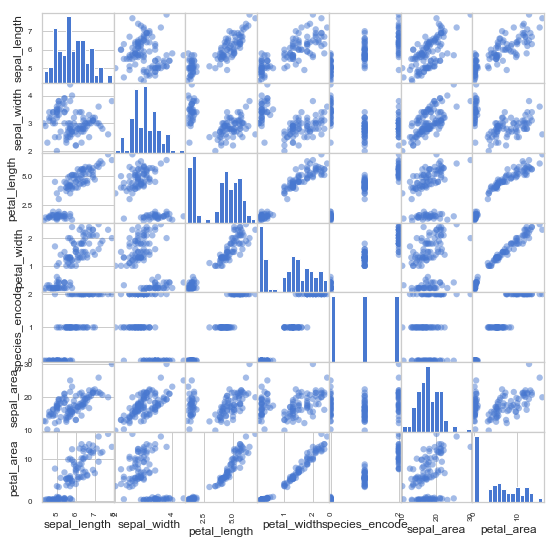

In [15]:
from pandas.tools.plotting import scatter_matrix
from matplotlib import cm

cmap = cm.get_cmap('gnuplot')
scatter = pd.scatter_matrix(
    train_df, marker='o', s=40,
    hist_kwds={'bins':15},  figsize=(9,9), cmap=cmap)

6. Is the sepal length significantly different in virginica than versicolor? Run an experiment to test this.

must include null hypothesis, alternative hyp, t-test, results, summary

null-hypothesis: the difference in sepal length between virginica and versicolor is insignificant.

alternative-hypothesis: the difference in sepal length between virginica and versicolor is substantial.

We will test if the sepal length of virginica is significantly different than that of the versicolor.

If there is difference, then variable sepal_length is a good choice to keep as a feature.

We can use a t-test here, as sepal_length is somewhat normally distributed.

In [16]:
import scipy as sp 
import numpy as np

sp.stats.ttest_ind(
    train_df[train_df.species == 'virginica'].sepal_length.dropna(),
    train_df[train_df.species == 'versicolor'].sepal_length.dropna())

# is the t-statistic < -1.96 or > 1.96?
# if so, then look at p-value to ensure it is less than our alpha of .05.
# RESULTS: Ttest_indResult(statistic=4.689639600247356, 
#                          pvalue=1.364082860373532e-05)

# t-statistic is greater than 1.96
# p-value is less than .05
# so the difference in sepal length between 
# virginica and versicolor is substantial.
# So I am rejecting the null hypothesis.

Ttest_indResult(statistic=4.689639600247356, pvalue=1.364082860373532e-05)